In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input,Dense,Dropout

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [3]:
# Build the neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2024-03-01 15:26:52.731901: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-01 15:26:52.731925: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-01 15:26:52.731936: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-01 15:26:52.731974: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 15:26:52.731993: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


2024-03-01 15:26:53.540206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 18s 23ms/step - loss: 0.2205 - accuracy: 0.9326 - val_loss: 0.0720 - val_accuracy: 0.9785
Epoch 2/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0650 - accuracy: 0.9789 - val_loss: 0.0641 - val_accuracy: 0.9816
Epoch 3/5
750/750 [==============================] - 17s 23ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0581 - val_accuracy: 0.9825
Epoch 4/5
750/750 [==============================] - 17s 23ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0713 - val_accuracy: 0.9799
Epoch 5/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0558 - val_accuracy: 0.9866


In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0443 - accuracy: 0.9879
Test accuracy: 0.9879000186920166


In [7]:
predictions=model.predict(test_images[:10])

1/1 [==============================] - 1s 923ms/step


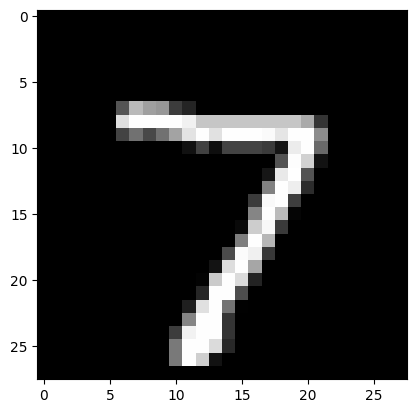

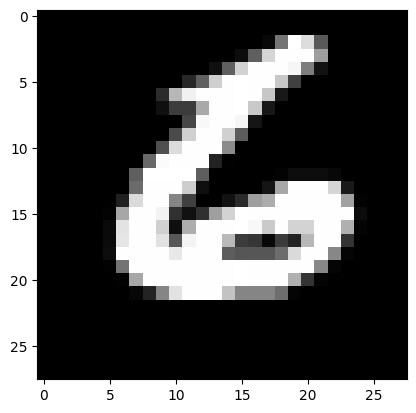

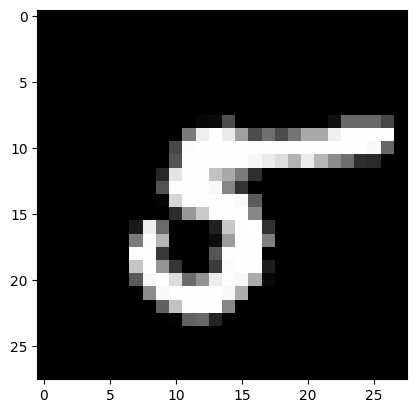

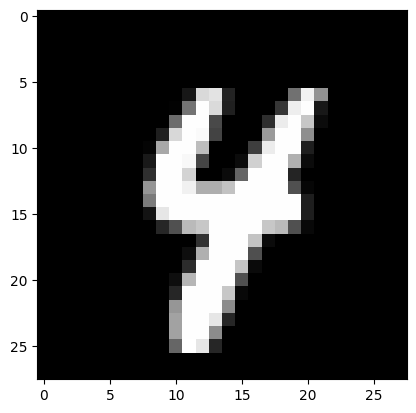

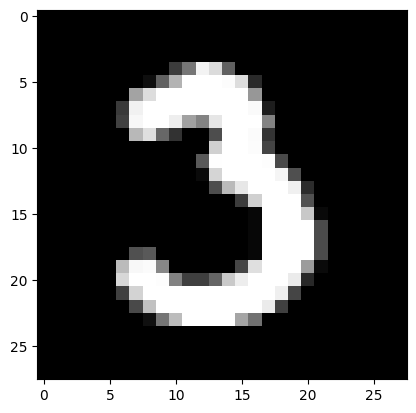

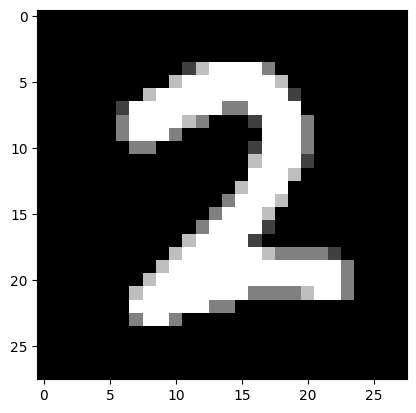

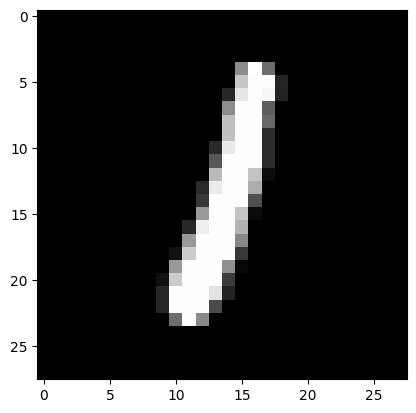

In [35]:
import matplotlib.pyplot as plt 
for i in range(7):
    plt.imshow(test_images[-i].reshape(28, 28), cmap='gray')
    plt.show()

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0443 - accuracy: 0.9879
Test accuracy: 0.9879000186920166
